# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data=data,index=labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [150]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [151]:
df.head(3)
df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [152]:
df[["animal","age"]]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [153]:
df[["animal","age"]].iloc[[3,4,8]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [154]:
df[df['visits']>=3] #assuming that >= is meant; > will return an empty dataframe

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


```Select the rows where the age is missing, i.e. is `NaN`.```

In [155]:
df[df['age'].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [156]:
df[(df['animal']=='cat')&(df['age']<=3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no


```Select the rows the age is between 2 and 4 (inclusive).```

In [157]:
df[(2<=df['age'])&(df['age'])<=4]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Change the age in row 'f' to 1.5.```

In [158]:
df.loc["f","age"]=1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [159]:
df['visits'].sum()
np.sum(df['visits'])

19

```Calculate the mean age for each different animal in `df`.```

In [160]:
df.groupby(['animal'])['age'].mean()
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [161]:
temp_df = pd.DataFrame(data = {'animal': 'horse',
        'age': 500,
        'visits': 999,
        'priority': 'no'}, index=['k'])
df = df.append(temp_df)
print(df)
df = df.drop('k')
print(df)

  animal    age  visits priority
a    cat    2.5       1      yes
b    cat    3.0       3      yes
c  snake    0.5       2       no
d    dog    NaN       3      yes
e    dog    5.0       2       no
f    cat    1.5       3       no
g  snake    4.5       1       no
h    cat    NaN       1      yes
i    dog    7.0       2       no
j    dog    3.0       1       no
k  horse  500.0     999       no
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Count the number of each type of animal in `df`.```

In [162]:
df.groupby(['animal']).size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [163]:
df.sort_values(['age','visits'] , ascending = [False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [164]:
df['priority'] = (df['priority'] == 'yes')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [165]:
df['animal'].replace(to_replace='snake',value='python')


a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [166]:
df.pivot_table(index='animal',columns='visits',values='age')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [167]:
labels = [i for i in range(1000)]
data = {'age':np.random.randint(20,66,1000),
        'skill':np.clip(np.random.normal(0.5,0.3,1000),0,1),
        'height':np.round(np.random.uniform(1.5,2,1000),2)}

new_df = pd.DataFrame(data = data, index = labels)
new_df

,age,skill,height
0,43,0.671496,1.88
1,22,0.893130,1.84
2,24,0.389604,1.65
3,63,0.000000,1.97
4,32,0.564947,1.92
5,32,0.278521,1.74
6,22,0.204610,1.94
7,50,0.529556,1.60
8,32,0.720613,1.87
9,49,0.226299,1.78


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [168]:
new_df['salary'] = 1000*((np.square(new_df['age'])/1000)+1.7*new_df['skill']+0.4*np.exp(-np.square(new_df['height']-1.7)))
new_df

,age,skill,height,salary
0,43,0.671496,1.88,3377.790191
1,22,0.893130,1.84,2394.556768
2,24,0.389604,1.65,1637.327981
3,63,0.000000,1.97,4340.877518
4,32,0.564947,1.92,2365.510602
5,32,0.278521,1.74,1896.845410
6,22,0.204610,1.94,1209.448720
7,50,0.529556,1.60,3796.264440
8,32,0.720613,1.87,2637.648243
9,49,0.226299,1.78,3183.155792


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [169]:
def helper(row):
  return int(new_df.loc[row]['age']/10)


new_df.groupby(helper).agg({'salary':[np.mean, len], 'height':'max'})
            

salary        height
          mean    len    max
2  1834.869317  225.0   2.00
3  2463.705040  223.0   2.00
4  3203.329819  197.0   2.00
5  4152.039327  212.0   2.00
6  5143.865351  143.0   1.99

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
def bakasha_munfezet(x):
  return x['salary'].mean()/x['height'].sum()
temp_df = new_df.groupby(['age']).apply(bakasha_munfezet)

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

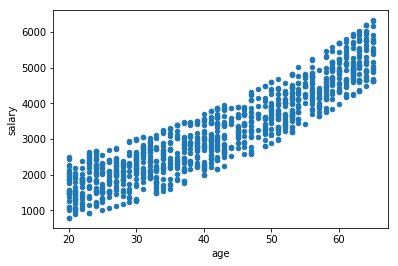

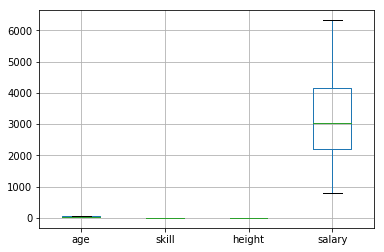

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline
new_df.plot(x='age', y='salary', kind="scatter")
plt.show()
new_df.boxplot()
plt.show()

```Save the result as a csv```

In [0]:
new_df.to_csv(path_or_buf='a.csv')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')
pd.options.display.max_columns=50

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

The oldest house is house #1349 which was built in 1872
The highest price of a house in 1872 was 122000
The mean area of houses is 10516.828082191782
The 50-precentile value of the areas of houses is 9478.5
The percent of houses with a fireplace is 52.73972602739726%, so there are more houses with fireplaces than without
The mean price of houses with a pool is 288138.5714285714


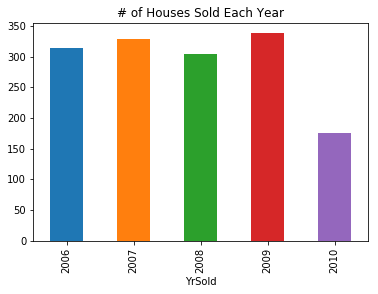

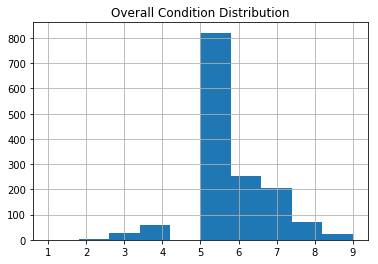

                SalePrice  YearBuilt      FullBath
                     mean     howOld howManyUnique
Fireplaces                                        
0           141331.482609  54.781159             4
1           211843.909231  39.150769             4
2           240588.539130  54.347826             4
3           252000.000000  38.400000             2


OverallQual                  
             mean max min       std
False    5.556180  10   3  1.193055
True     6.389908   9   4  1.111021

In [175]:
yearId = df['YearBuilt'].idxmin()
year = df['YearBuilt'].min(axis=0)
print("The oldest house is house #" + str(yearId) + " which was built in " + str(year))
print("The highest price of a house in " + str(year) + " was " + str(df[df['YearBuilt'] == year]['SalePrice'].max()))
meanArea = df['LotArea'].mean()
print("The mean area of houses is " + str(meanArea))
fiftyPrecentile = df['LotArea'].quantile(q=0.5)
print("The 50-precentile value of the areas of houses is " + str(fiftyPrecentile))
haveFireplacePercent=100*df[df['Fireplaces']!=0]['Fireplaces'].count()/df['Fireplaces'].count()
print("The percent of houses with a fireplace is " + str(haveFireplacePercent) + "%, so there are more houses with fireplaces than without")
meanPrice = df[(df['PoolArea']>0)]['SalePrice'].mean()
print("The mean price of houses with a pool is " + str(meanPrice))
df.groupby(['YrSold']).size().plot(kind = 'bar')
plt.title('# of Houses Sold Each Year')
plt.show()
df.hist(column = 'OverallCond')
plt.title('Overall Condition Distribution')
plt.show()

group = df.groupby('Fireplaces')

def howOld(yr):
    return 2019-yr.mean()
def howManyUnique(num):
    return len(np.unique(num))

print(group.agg({'SalePrice':['mean'],'YearBuilt':howOld, 'FullBath':howManyUnique}))

def isMultOf20(row):
  return df['MSSubClass'].loc[row]%20==0
df[df['MSSubClass']>60].groupby(isMultOf20).agg({'OverallQual':['mean','max','min','std']})

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [176]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner


```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [182]:
df['LotAreaSM']=df['LotArea']*0.09290304
df['TotalFlrsSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['SqrtGarageArea'] = df['GarageArea'] ** 0.5
df['LotAreaPerBedrmAbvGr'] = df['LotArea'] / (df['BedroomAbvGr'] + 1)
merged = pd.merge((df.groupby('YearBuilt').mean()['LotArea'] + 1e-5).reset_index(),df,on='YearBuilt')
df['LotAreaPerMeanLotAreaSameYear'] = merged['LotArea_y']/merged['LotArea_x']
df['LotAreaRank']=df['LotArea'].rank(method='max')
dummies= pd.get_dummies(df['LotConfig'])
df[dummies.columns]=dummies
names = ['LotAreaSM','TotalFlrsSF','SqrtGarageArea','LotAreaPerBedrmAbvGr','LotAreaPerMeanLotAreaSameYear','LotAreaRank','Corner','CulDSac','FR2','FR3','Inside']

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig,LotAreaSM,TotalFlrsSF,SqrtGarageArea,LotAreaPerBedrmAbvGr,LotAreaPerMeanLotAreaSameYear,LotAreaRank,Corner,CulDSac,FR2,FR3,Inside
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside,785.030688,1710,23.409400,2112.500000,1.000000,513.0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2,891.869184,1262,21.447611,2400.000000,1.000000,779.0,0,0,1,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside,1045.159200,1786,24.657656,2812.500000,1.501327,1053.0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner,887.224032,1717,25.337719,2387.500000,0.734904,745.0,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2,1324.797350,2198,28.913665,2852.000000,0.955375,1310.0,0,0,1,0,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside,1311.326410,1362,21.908902,7057.500000,0.808394,1300.0,0,0,0,0,1
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside,936.834255,1694,25.219040,2521.000000,1.000000,854.0,0,0,0,0,1
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner,964.519361,2090,22.000000,2595.500000,0.975610,908.0,1,0,0,0,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside,568.566605,1774,21.633308,2040.000000,1.024390,220.0,0,0,0,0,1
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner,689.340557,1077,14.317821,2473.333333,1.100917,350.0,1,0,0,0,0


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/us

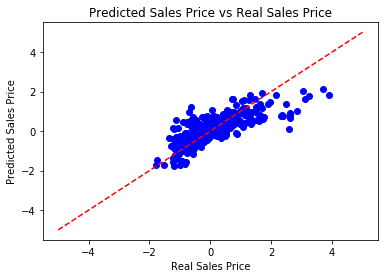

0.2933351076798618


In [184]:
# creating test and train segments, with 70%-30% division
featureTrain, featureTest, targetTrain, targetTest= train_test_split(df[names], df[['SalePrice']], test_size=0.3)

#normalizing
scalerX = StandardScaler().fit(featureTrain)
scalerY = StandardScaler().fit(targetTrain)

n_featureTrain = scalerX.transform(featureTrain)
n_featureTest = scalerX.transform(featureTest)
n_targetTrain = scalerY.transform(targetTrain)
n_targetTest = scalerY.transform(targetTest)


# fitting
reg = LinearRegression(normalize=True).fit(n_featureTrain, n_targetTrain)
targetPredictions = reg.predict(n_featureTest)

#plotting the predicted targets vs the test targets, with y = x line to compare
plt.plot(n_targetTest, targetPredictions, 'bo', [-5,5], [-5,5], 'r--')
plt.title('Predicted Sales Price vs Real Sales Price')
plt.xlabel("Real Sales Price")
plt.ylabel("Predicted Sales Price")
plt.show()
print(mean_squared_error(n_targetTest,targetPredictions))

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipyker

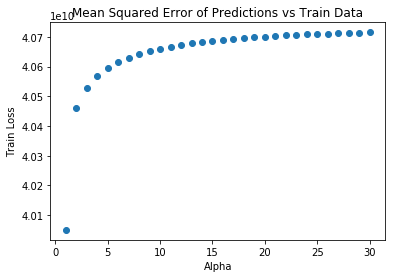

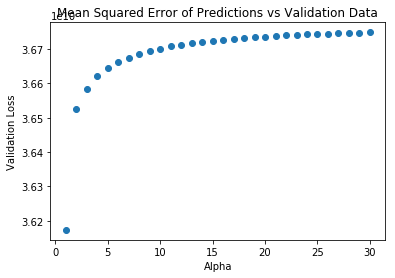

In [203]:
new_names=names[:]
for name in names:
    df["{0}^2".format(name)]=df[name]**2
    df["{0}^3".format(name)]=df[name]**3
    new_names.append("{0}^2".format(name))
    new_names.append("{0}^3".format(name))
    
# creating test and train segments, with 70%-30% division
featureTrain, featureTest, targetTrain, targetTest= train_test_split(df[names], df[['SalePrice']], test_size=0.3)
# splitting train segment to train and validate, again 70%-30%
featureTrain, featureValidate, targetTrain, targetValidate = train_test_split(featureTrain, targetTrain, test_size=0.3)

#normalizing
scalerX = StandardScaler().fit(featureTrain)
scalerY = StandardScaler().fit(targetTrain)

n_featureTrain = scalerX.transform(featureTrain)
n_featureValidate = scalerX.transform(featureValidate)
n_targetTrain = scalerY.transform(targetTrain)
n_targetValidate = scalerY.transform(targetValidate)

#normalizing test data for future use
n_featureTest = scalerX.transform(featureTest)
n_targetTest = scalerY.transform(targetTest)

# computing fits and loss for each alpha in [1,30]
trainLoss = [0]*30
validateLoss = [0]*30

for i in range(30):
  reg = Ridge(alpha=i, normalize = True)
  reg.fit(n_featureTrain,n_targetTrain)
  
  trainLoss[i] = mean_squared_error(targetTrain, reg.predict(featureTrain))
  validateLoss[i] = mean_squared_error(targetValidate, reg.predict(featureValidate))
  
# plot train loss
plt.scatter(list(range(1,31)), trainLoss)
plt.xlabel('Alpha')
plt.ylabel('Train Loss')
plt.title('Mean Squared Error of Predictions vs Train Data')
plt.show()
    
# plot validate loss
plt.scatter(list(range(1,31)), validateLoss)
plt.xlabel('Alpha')
plt.ylabel('Validation Loss')
plt.title('Mean Squared Error of Predictions vs Validation Data')
plt.show() 

    


It can be seen that the loss is minimal at minimal alphas, both on the train and validation data. This means that choosing a low alpha (e.g 1) is safe


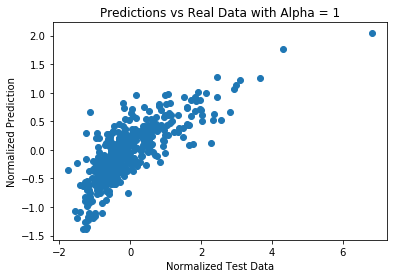

0.4140637243559794


In [204]:
print('It can be seen that the loss is minimal at minimal alphas, both on the train and validation data. This means that choosing a low alpha (e.g 1) is safe')

# fitting to test data with low alpha (1)
reg = Ridge(alpha=1, normalize = True)
reg.fit(n_featureTrain,n_targetTrain)
predictions = reg.predict(n_featureTest)

# plotting and computing loss
plt.scatter(n_targetTest, predictions )
plt.xlabel('Normalized Test Data')
plt.ylabel('Normalized Prediction')
plt.title('Predictions vs Real Data with Alpha = 1')
plt.show()
print(mean_squared_error(n_targetTest, predictions))